**Лабораторная работа 2**

ИУ5И-21М Хаммуд Хала

**Цель работы**

Изучение продвинутых способов предварительной обработки данных для дальнейшего формирования моделей.

**Задание**

Выбрать набор данных (датасет), содержащий категориальные и числовые признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.) Просьба не использовать датасет, на котором данная задача решалась в лекции.

Для выбранного датасета (датасетов) на основе материалов лекций решить следующие задачи:

устранение пропусков в данных;

кодирование категориальных признаков;

нормализация числовых признаков.

**Ход работы**

In [4]:
# Импорт стандартных библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")



In [2]:
# Проверка наличия пропущенных значений в данных
df.isnull().sum()


,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
target,0


In [5]:
# Загрузка набора данных о жилье в Калифорнии
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
df = pd.DataFrame(data=housing.data, columns=housing.feature_names)

# Добавляем целевую переменную (стоимость жилья)
df['target'] = housing.target

# Просмотр общей информации о наборе данных
print(df.info())

# Просмотр первых 5 строк
df.head(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
print(df.info())
missing_indices = np.random.choice(df.index, size=int(len(df) * 0.1), replace=False)
df.loc[missing_indices, 'Physical Activity Level'] = np.nan

print(df.isnull().sum())

df.to_csv('Sleep_health_with_missing_values.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
MedInc                         0
HouseAge                       0
AveRooms                       0
AveBedrms                      0
Population                     0
AveOccup                       0
Latitude                       0
Longitude                      0
target                         0
Physical Activity Level    20640
dtype: int64


In [7]:
df = pd.read_csv("Sleep_health_with_missing_values.csv")
print(df.info())
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MedInc                   20640 non-null  float64
 1   HouseAge                 20640 non-null  float64
 2   AveRooms                 20640 non-null  float64
 3   AveBedrms                20640 non-null  float64
 4   Population               20640 non-null  float64
 5   AveOccup                 20640 non-null  float64
 6   Latitude                 20640 non-null  float64
 7   Longitude                20640 non-null  float64
 8   target                   20640 non-null  float64
 9   Physical Activity Level  0 non-null      float64
dtypes: float64(10)
memory usage: 1.6 MB
None


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target,Physical Activity Level
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,NaN
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,NaN
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,NaN
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,NaN
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,NaN
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697,NaN
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992,NaN
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414,NaN
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267,NaN
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611,NaN


In [8]:
# Удаление колонок с любыми пропущенными значениями
data_cleaned_cols = df.dropna(axis=1, how='any')

# Проверка информации о новом наборе данных
print(data_cleaned_cols.info())

# Сохранение очищенного набора данных в CSV файл
data_cleaned_cols.to_csv('california_cleaned_cols.csv', index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


In [10]:
# Удаление колонок с любыми пропущенными значениями
data_cleaned_cols = df.dropna(axis=1, how='any')

# Проверка информации о новом наборе данных
print(data_cleaned_cols.info())

# Сохранение очищенного набора данных в CSV файл
data_cleaned_cols.to_csv('california_cleaned_cols.csv', index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


In [11]:
# Удаление строк с любыми пропущенными значениями
data_cleaned_rows = df.dropna(axis=0, how='any')

# Проверка информации о новом наборе данных
print(data_cleaned_rows.info())

# Сохранение очищенного набора данных в CSV файл
data_cleaned_rows.to_csv('california_cleaned_rows.csv', index=False)


<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MedInc                   0 non-null      float64
 1   HouseAge                 0 non-null      float64
 2   AveRooms                 0 non-null      float64
 3   AveBedrms                0 non-null      float64
 4   Population               0 non-null      float64
 5   AveOccup                 0 non-null      float64
 6   Latitude                 0 non-null      float64
 7   Longitude                0 non-null      float64
 8   target                   0 non-null      float64
 9   Physical Activity Level  0 non-null      float64
dtypes: float64(10)
memory usage: 0.0 bytes
None


In [12]:
# Импорт необходимых библиотек
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.datasets import fetch_california_housing

# Загрузка набора данных о жилье в Калифорнии
housing = fetch_california_housing()
df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
df['target'] = housing.target

# Определение числовых и категориальных признаков
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['object']).columns

# Заполнение числовых признаков средним значением
imputer_mean = SimpleImputer(strategy='mean')
df[numeric_features] = imputer_mean.fit_transform(df[numeric_features])

# Проверка наличия категориальных признаков (в нашем случае их нет)
if len(categorical_features) > 0:
    imputer_most_fre = SimpleImputer(strategy='most_frequent')
    df[categorical_features] = imputer_most_fre.fit_transform(df[categorical_features])

# Сохранение обработанных данных
df.to_csv('california_imputed_mean_mode.csv', index=False)

# Проверка информации о данных
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


In [14]:
# Загрузка двух версий набора данных
df_missing = pd.read_csv('california_cleaned_rows.csv')            # Исходные данные
df_imputed = pd.read_csv('california_imputed_mean_mode.csv')       # Данные после заполнения пропусков

# Выбор ключевых числовых признаков для сравнения
num_features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

# В нашем наборе данных категориальных признаков нет,
# но создадим пустой список для совместимости кода
cat_features = []


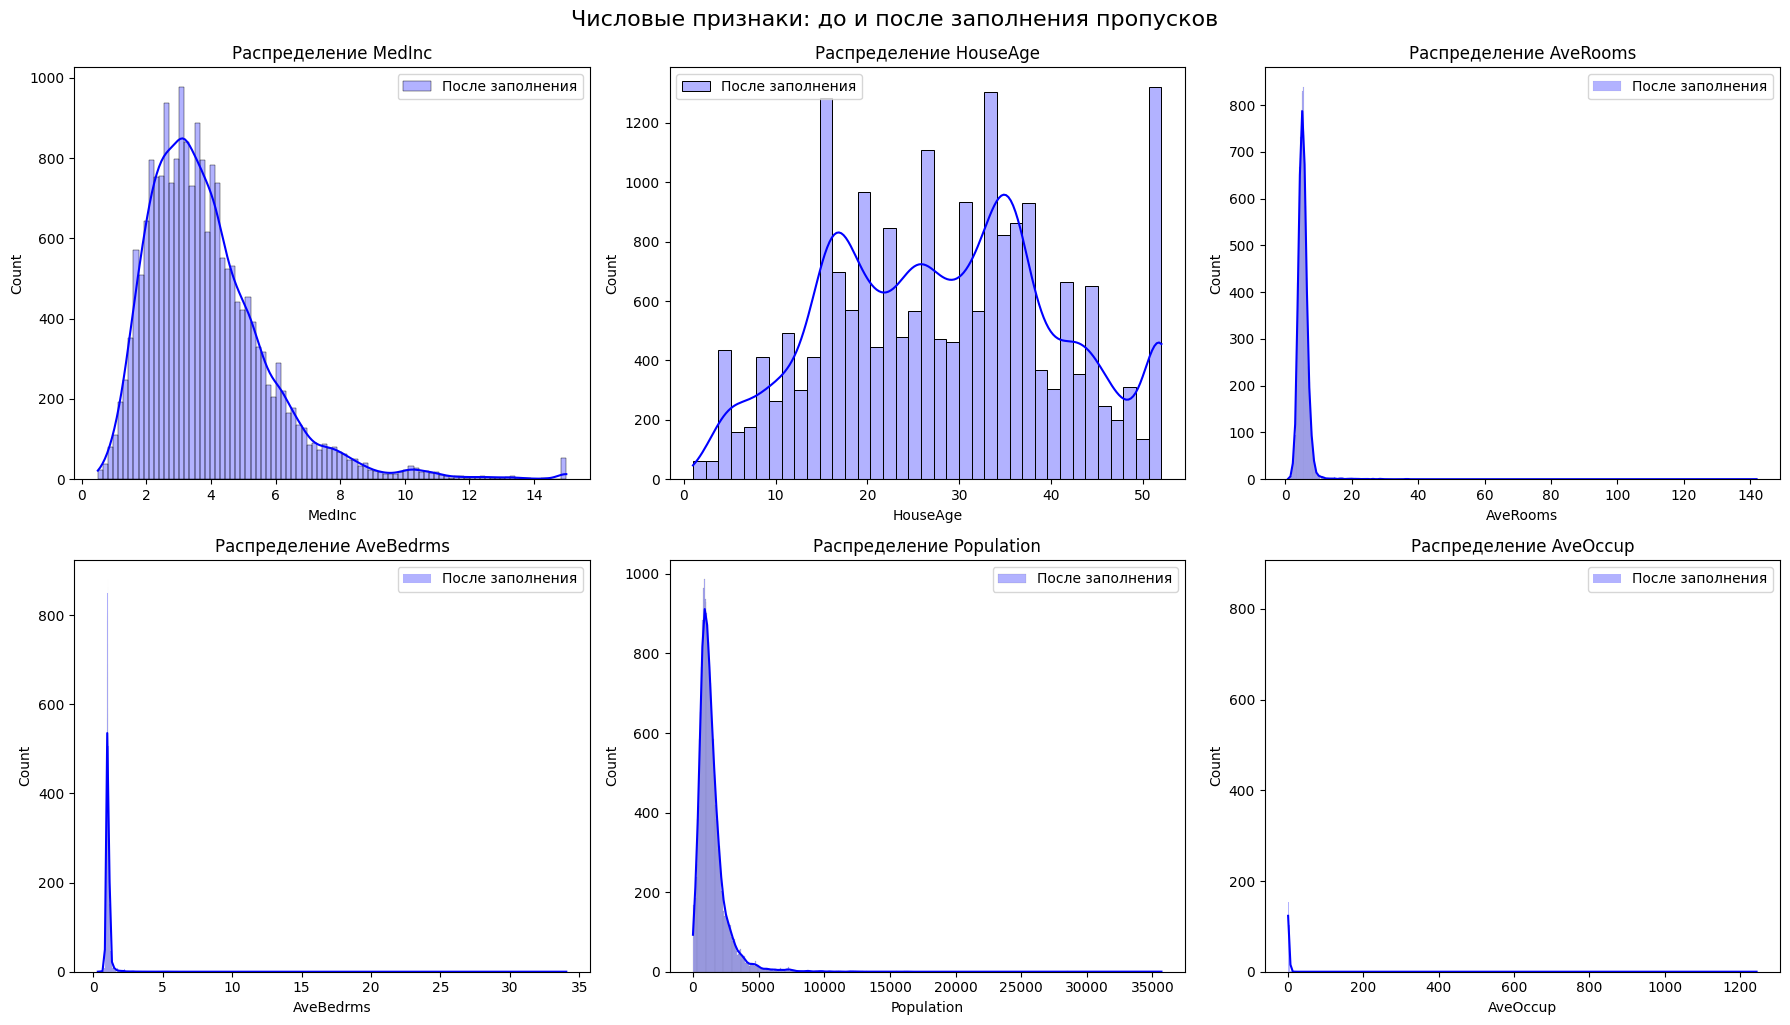

In [15]:
# Загрузка двух версий набора данных
df_missing = pd.read_csv('california_cleaned_rows.csv')            # До заполнения пропусков
df_imputed = pd.read_csv('california_imputed_mean_mode.csv')       # После заполнения пропусков

# Выбор числовых признаков для сравнения
num_features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

# Построение распределений до и после заполнения пропусков
plt.figure(figsize=(18, 10))

for i, col in enumerate(num_features, 1):
    plt.subplot(2, 3, i)

    # Распределение до заполнения пропусков (красная пунктирная линия)
    sns.histplot(df_missing[col], color='red', kde=True,
                 alpha=0.3, line_kws={'linestyle': '--'}, label='До заполнения')

    # Распределение после заполнения пропусков (синяя сплошная линия)
    sns.histplot(df_imputed[col], color='blue', kde=True,
                 alpha=0.3, line_kws={'linestyle': '-'}, label='После заполнения')

    plt.title(f'Распределение {col}')
    plt.legend()

plt.tight_layout()
plt.suptitle('Числовые признаки: до и после заполнения пропусков', y=1.02, fontsize=16)
plt.show()


In [16]:
# Проверка наличия категориальных признаков
if len(cat_features) > 0:
    plt.figure(figsize=(15, 5))
    for i, col in enumerate(cat_features, 1):
        plt.subplot(1, 3, i)

        # Вычисляем пропорции для данных до заполнения пропусков
        missing_props = df_missing[col].value_counts(normalize=True).rename('proportion').reset_index()
        missing_props['Dataset'] = 'До заполнения'

        # Вычисляем пропорции для данных после заполнения пропусков
        imputed_props = df_imputed[col].value_counts(normalize=True).rename('proportion').reset_index()
        imputed_props['Dataset'] = 'После заполнения'

        # Объединяем два набора
        combined = pd.concat([missing_props, imputed_props])

        # Строим barplot
        sns.barplot(
            data=combined,
            x=col,
            y='proportion',
            hue='Dataset',
            palette={'До заполнения': 'red', 'После заполнения': 'blue'},
            alpha=0.7
        )

        plt.title(f'Распределение {col}')
        plt.xlabel(col)
        plt.ylabel('Доля')
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Категориальных признаков для отображения нет.")


Категориальных признаков для отображения нет.


In [17]:
# Импорт необходимых библиотек
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.datasets import fetch_california_housing

# Загрузка набора данных о жилье в Калифорнии
housing = fetch_california_housing()
df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
df['target'] = housing.target

# Определение числовых и категориальных признаков
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['object']).columns

# Заполнение числовых признаков с помощью KNNImputer
imputer_knn = KNNImputer(n_neighbors=5, weights='distance')
df[numeric_features] = imputer_knn.fit_transform(df[numeric_features])

# В нашем наборе нет категориальных признаков, поэтому пропускаем их обработку

# Сохранение обработанных данных
df.to_csv('california_imputed_knn.csv', index=False)

# Проверка информации о новых данных
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


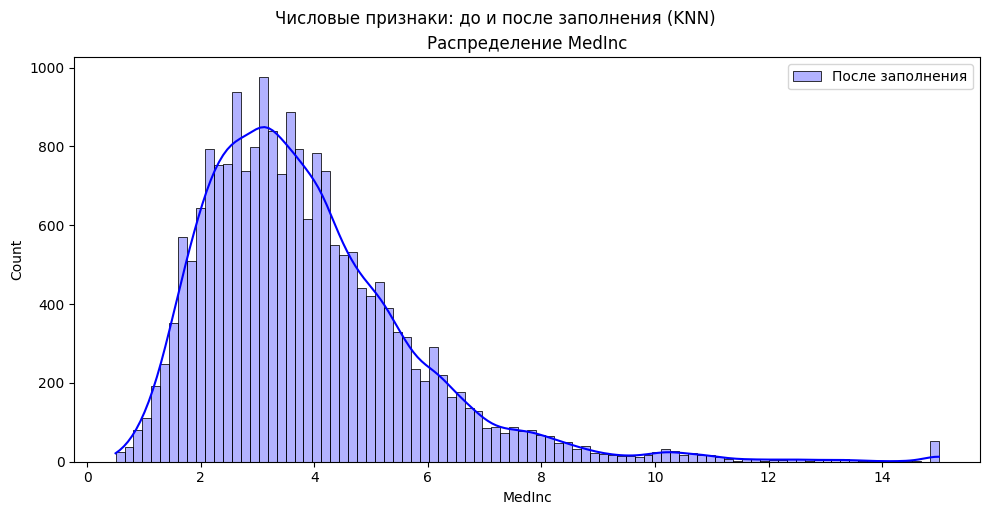

In [18]:
# Загрузка двух версий набора данных
df_missing = pd.read_csv('california_cleaned_rows.csv')            # До заполнения пропусков
df_imputed = pd.read_csv('california_imputed_knn.csv')             # После заполнения с помощью KNN

# Выбор одной числовой переменной для сравнения
num_features = ['MedInc']  # Можно выбрать любую ключевую переменную, например, доход

# Построение распределения до и после заполнения
plt.figure(figsize=(10, 5))

for i, col in enumerate(num_features, 1):
    plt.subplot(1, 1, i)

    # Распределение до заполнения пропусков (красная пунктирная линия)
    sns.histplot(df_missing[col], color='red', kde=True,
                 alpha=0.3, line_kws={'linestyle': '--'}, label='До заполнения')

    # Распределение после заполнения пропусков (синяя сплошная линия)
    sns.histplot(df_imputed[col], color='blue', kde=True,
                 alpha=0.3, line_kws={'linestyle': '-'}, label='После заполнения')

    plt.title(f'Распределение {col}')
    plt.legend()

plt.tight_layout()
plt.suptitle('Числовые признаки: до и после заполнения (KNN)', y=1.02)
plt.show()


In [19]:
# Импорт необходимых библиотек для итеративного заполнения пропусков
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
from sklearn.datasets import fetch_california_housing

# Загрузка набора данных о жилье в Калифорнии
housing = fetch_california_housing()
df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
df['target'] = housing.target

# Определение числовых признаков
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns

# Итеративное заполнение пропущенных данных с помощью Random Forest
imputer_missforest = IterativeImputer(estimator=RandomForestRegressor(n_estimators=10, random_state=0),
                                      max_iter=10, random_state=0)

df[numeric_features] = imputer_missforest.fit_transform(df[numeric_features])

# Сохранение обработанных данных
df.to_csv('california_imputed_missforest.csv', index=False)

# Проверка информации о новых данных
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


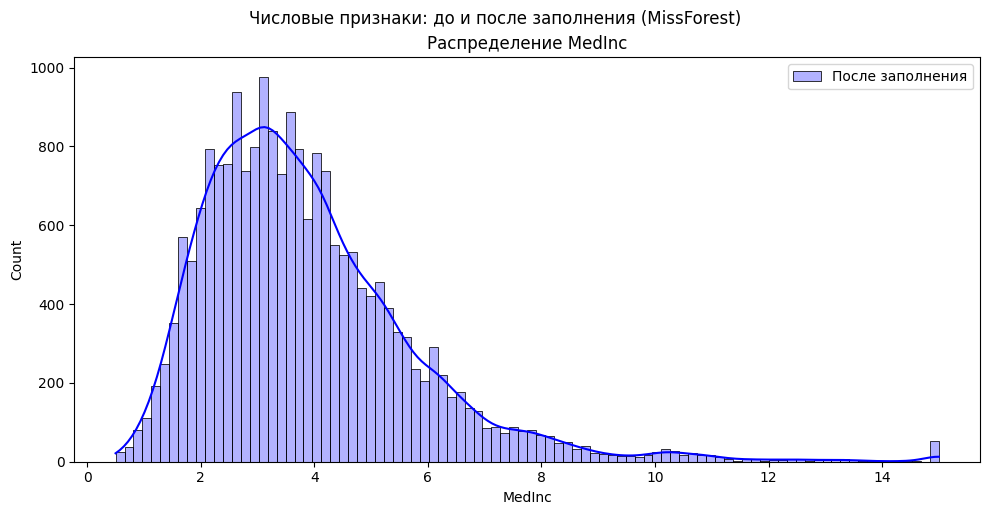

In [20]:
# Загрузка двух версий набора данных
df_missing = pd.read_csv('california_cleaned_rows.csv')               # До заполнения пропусков
df_imputed = pd.read_csv('california_imputed_missforest.csv')         # После заполнения методом MissForest

# Выбор одной числовой переменной для сравнения
num_features = ['MedInc']  # Выберем переменную "Средний доход"

# Построение распределения до и после заполнения
plt.figure(figsize=(10, 5))

for i, col in enumerate(num_features, 1):
    plt.subplot(1, 1, i)

    # Распределение до заполнения пропусков (красная пунктирная линия)
    sns.histplot(df_missing[col], color='red', kde=True,
                 alpha=0.3, line_kws={'linestyle': '--'}, label='До заполнения')

    # Распределение после заполнения пропусков (синяя сплошная линия)
    sns.histplot(df_imputed[col], color='blue', kde=True,
                 alpha=0.3, line_kws={'linestyle': '-'}, label='После заполнения')

    plt.title(f'Распределение {col}')
    plt.legend()

plt.tight_layout()
plt.suptitle('Числовые признаки: до и после заполнения (MissForest)', y=1.02)
plt.show()


In [21]:
# Импорт необходимых библиотек
import pandas as pd
from sklearn.datasets import fetch_california_housing

# Загрузка набора данных о жилье в Калифорнии
housing = fetch_california_housing()
df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
df['target'] = housing.target

# Функция для расчета экстремального значения
def calculate_extreme_value(column):
    if pd.api.types.is_numeric_dtype(column):
        mean = column.mean()
        std = column.std()
        return mean + 3 * std
    else:
        return None

# Создание словаря экстремальных значений
extreme_values = {}
for column in df.columns:
    extreme_value = calculate_extreme_value(df[column])
    if extreme_value is not None:
        extreme_values[column] = extreme_value

# Заполнение пропущенных значений экстремальными значениями
df.fillna(value=extreme_values, inplace=True)

# Сохранение обработанных данных
df.to_csv('california_imputed_extreme.csv', index=False)

# Проверка информации о новых данных
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


In [22]:
# Импорт библиотеки для кодирования меток
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.datasets import fetch_california_housing

# Загрузка набора данных о жилье в Калифорнии
housing = fetch_california_housing()
df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
df['target'] = housing.target

# Инициализация LabelEncoder
le = LabelEncoder()

# Поиск категориальных признаков
categorical_features = df.select_dtypes(include=['object']).columns

# Применение кодирования, если есть категориальные признаки
if len(categorical_features) > 0:
    for col in categorical_features:
        df[col + '_le'] = le.fit_transform(df[col])
    print(df[[col for col in df.columns if '_le' in col]])
else:
    print("Категориальных признаков для кодирования нет.")

# Сохранение результата
df.to_csv('california_label_encoded.csv', index=False)


Категориальных признаков для кодирования нет.


In [23]:
# Импорт библиотеки pandas
import pandas as pd
from sklearn.datasets import fetch_california_housing

# Загрузка набора данных о жилье в Калифорнии
housing = fetch_california_housing()
df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
df['target'] = housing.target

# Проверка наличия категориальных признаков
categorical_features = df.select_dtypes(include=['object']).columns

# Применение One-Hot Encoding
if len(categorical_features) > 0:
    data_onehot = pd.get_dummies(df, columns=categorical_features)
    print(data_onehot.head(5))
    data_onehot.to_csv('california_onehot_encoded.csv', index=False)
else:
    print("Категориальных признаков для One-Hot кодирования нет.")


Категориальных признаков для One-Hot кодирования нет.


In [24]:
# Импорт библиотеки numpy
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing

# Загрузка набора данных о жилье в Калифорнии
housing = fetch_california_housing()
df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
df['target'] = housing.target

# Применение логарифмического преобразования к переменной MedInc
df['MedInc_log'] = np.log(df['MedInc'])

# Просмотр первых 10 строк
print(df[['MedInc', 'MedInc_log']].head(10))


   MedInc  MedInc_log
0  8.3252    2.119287
1  8.3014    2.116424
2  7.2574    1.982022
3  5.6431    1.730434
4  3.8462    1.347086
5  4.0368    1.395452
6  3.6591    1.297217
7  3.1200    1.137833
8  2.0804    0.732560
9  3.6912    1.305952


In [25]:
# Импорт функции boxcox
from scipy.stats import boxcox
import pandas as pd
from sklearn.datasets import fetch_california_housing

# Загрузка набора данных о жилье в Калифорнии
housing = fetch_california_housing()
df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
df['target'] = housing.target

# Применение преобразования Box-Cox к переменной MedInc
# Важно: Box-Cox требует положительных значений
df['MedInc_boxcox'], param = boxcox(df['MedInc'])

# Вывод оптимального значения λ
print('Оптимальное значение λ:', param)

# Просмотр первых 10 строк
print(df[['MedInc', 'MedInc_boxcox']].head(10))


Оптимальное значение λ: 0.090854472181
   MedInc  MedInc_boxcox
0  8.3252       2.337069
1  8.3014       2.333598
2  7.2574       2.171690
3  5.6431       1.873879
4  3.8462       1.432988
5  4.0368       1.487772
6  3.6591       1.376755
7  3.1200       1.198726
8  2.0804       0.757488
9  3.6912       1.386586


In [26]:
# Импорт функции yeojohnson
from scipy.stats import yeojohnson
import pandas as pd
from sklearn.datasets import fetch_california_housing

# Загрузка набора данных о жилье в Калифорнии
housing = fetch_california_housing()
df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
df['target'] = housing.target

# Применение преобразования Yeo-Johnson к переменной MedInc
df['MedInc_yeo'], param = yeojohnson(df['MedInc'])

# Вывод оптимального значения λ
print('Оптимальное значение λ:', param)

# Просмотр первых 10 строк
print(df[['MedInc', 'MedInc_yeo']].head(10))


Оптимальное значение λ: -0.1985098875801701
   MedInc  MedInc_yeo
0  8.3252    1.803599
1  8.3014    1.801958
2  7.2574    1.724579
3  5.6431    1.578385
4  3.8462    1.354895
5  4.0368    1.382988
6  3.6591    1.326000
7  3.1200    1.234284
8  2.0804    1.008280
9  3.6912    1.331055


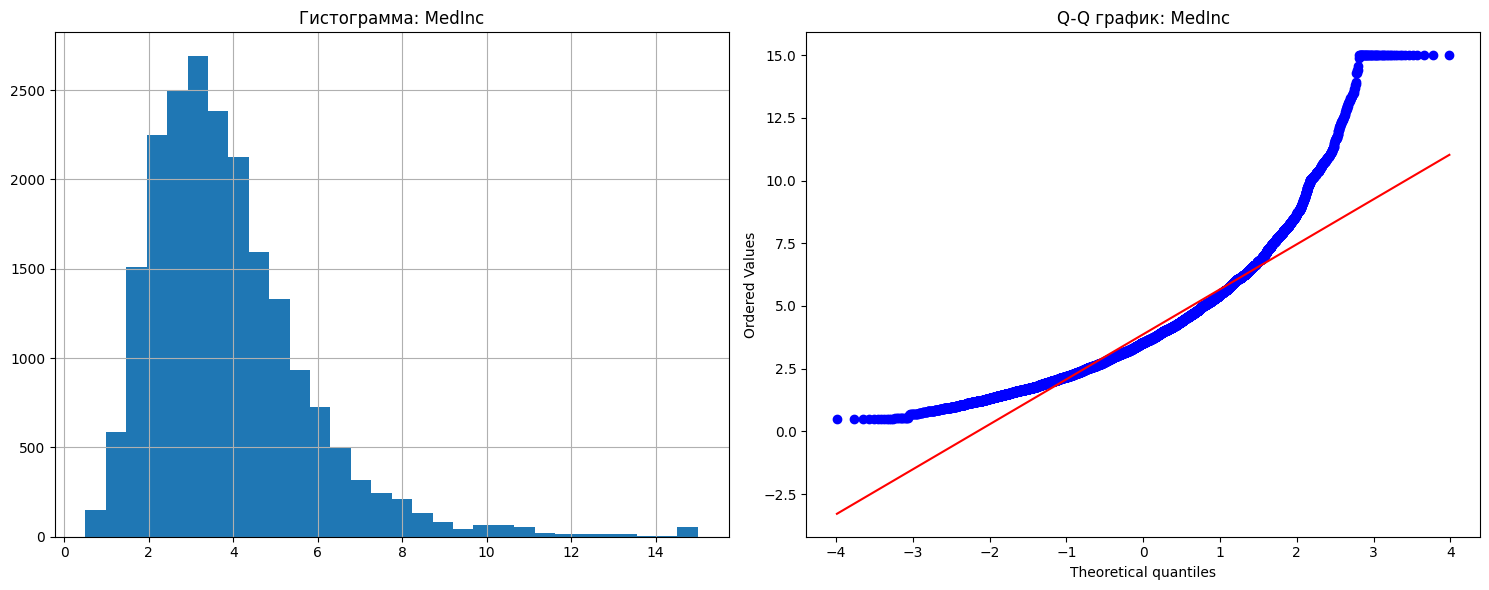

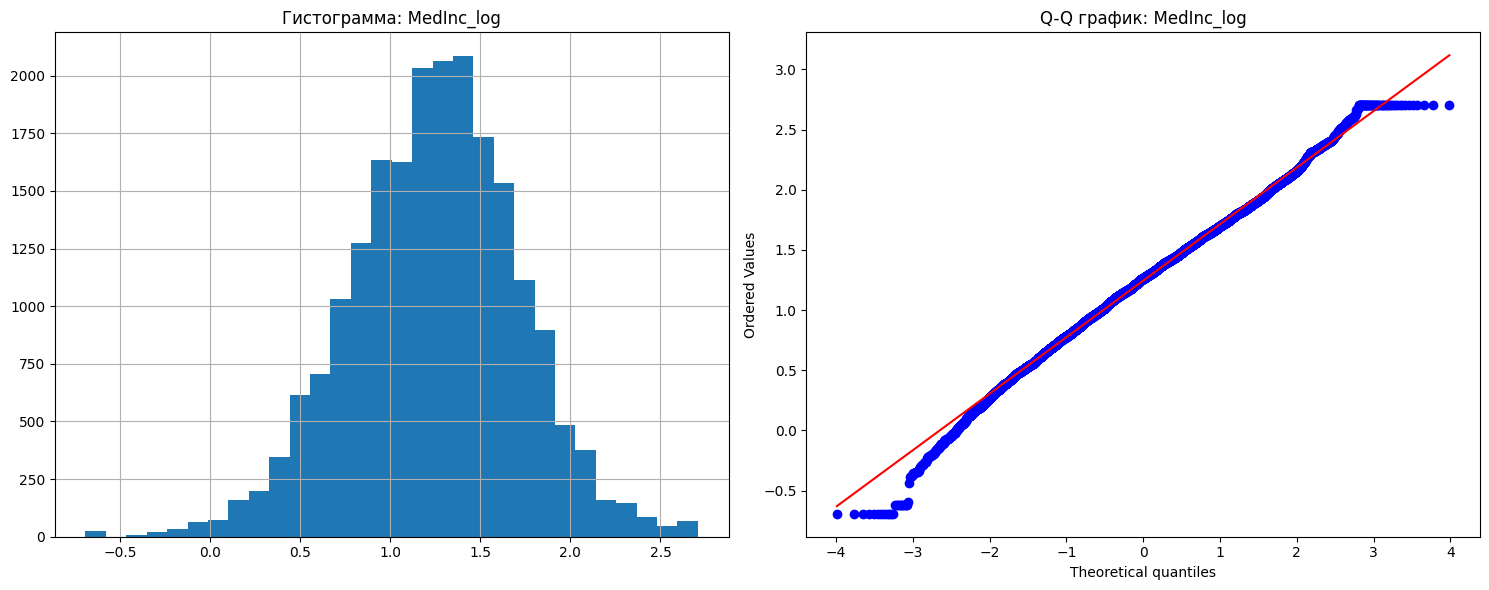

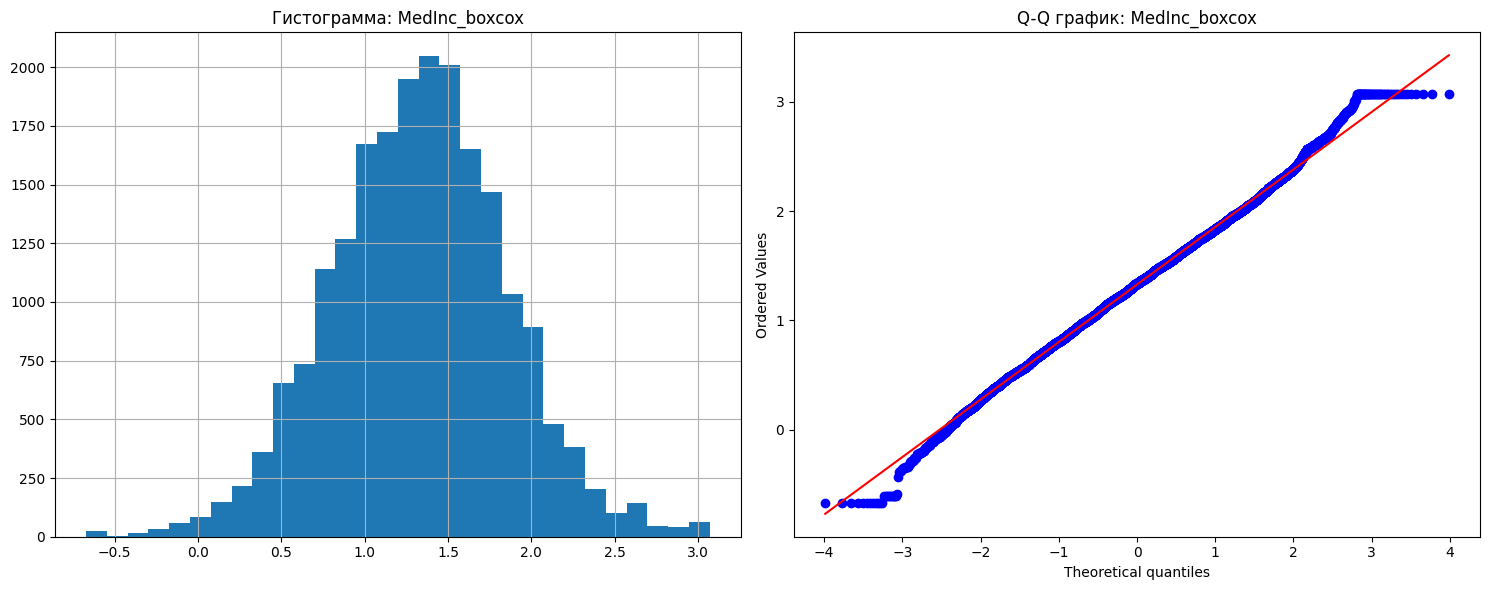

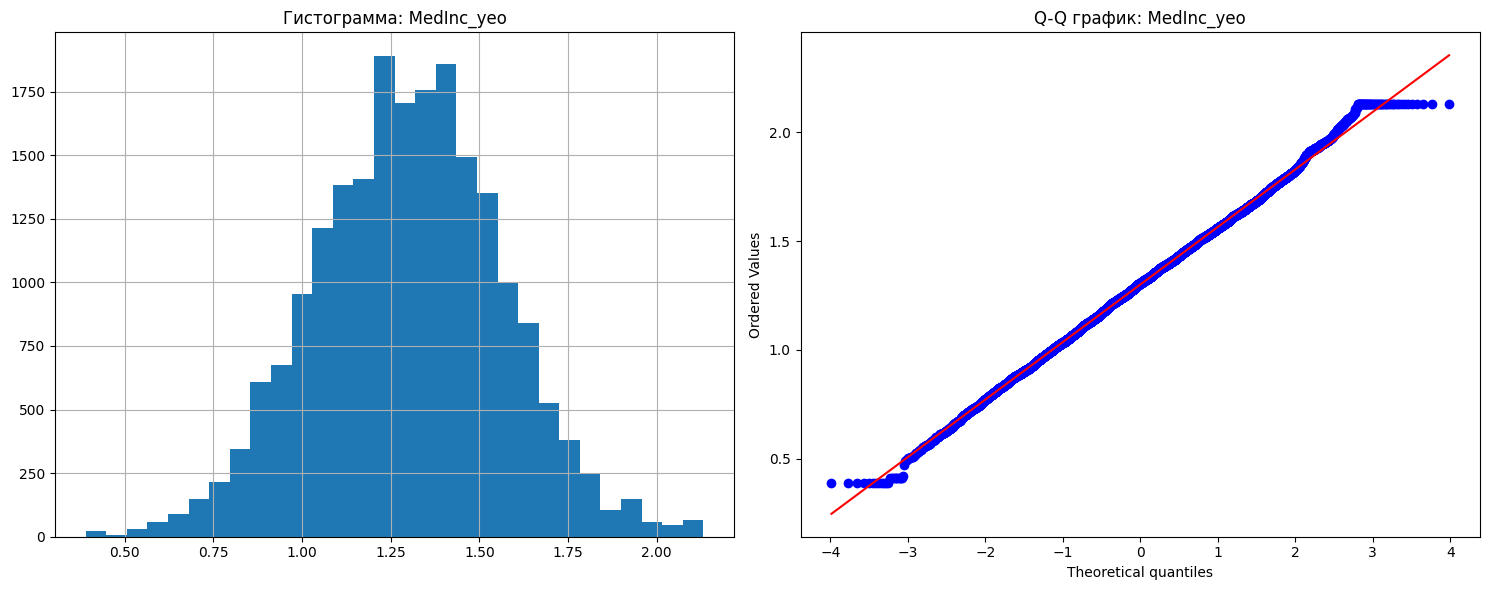

In [27]:
# Импорт необходимых библиотек
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
from sklearn.datasets import fetch_california_housing
import numpy as np
from scipy.stats import boxcox, yeojohnson

# Загрузка набора данных о жилье в Калифорнии
housing = fetch_california_housing()
df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
df['target'] = housing.target

# Преобразования переменной MedInc
df['MedInc_log'] = np.log(df['MedInc'])
df['MedInc_boxcox'], param_boxcox = boxcox(df['MedInc'])
df['MedInc_yeo'], param_yeo = yeojohnson(df['MedInc'])

# Функция для построения диагностических графиков
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))

    # Гистограмма
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    plt.title(f'Гистограмма: {variable}')

    # Q-Q график
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.title(f'Q-Q график: {variable}')

    plt.tight_layout()
    plt.show()

# Проверка распределений

# Оригинальные данные
diagnostic_plots(df, 'MedInc')

# После логарифмического преобразования
diagnostic_plots(df, 'MedInc_log')

# После Box-Cox преобразования
diagnostic_plots(df, 'MedInc_boxcox')

# После Yeo-Johnson преобразования
diagnostic_plots(df, 'MedInc_yeo')

# Сохранение итогового набора данных
df.to_csv('california_normalized.csv', index=False)
